In [262]:
#Imports 
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [263]:
# Loading data
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [264]:
# Getting infos about the data
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Getting some visualisationa bout the data

<AxesSubplot: xlabel='Survived', ylabel='count'>

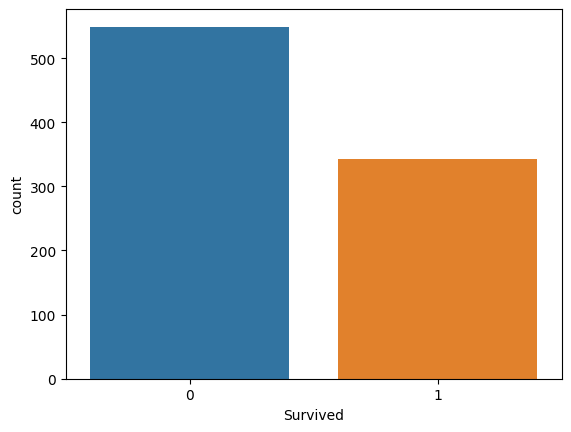

In [265]:
sns.countplot(x='Survived',data=df_train)

# Survival count by Sex

<AxesSubplot: xlabel='Survived', ylabel='count'>

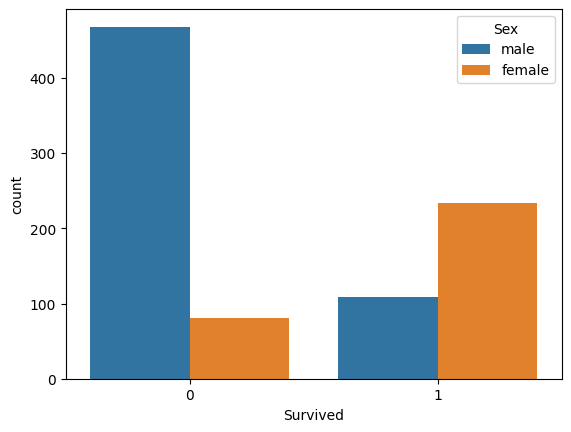

In [266]:
sns.countplot(x='Survived',data=df_train,hue='Sex')

In [267]:
df_train.isna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [268]:
df_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [269]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# We will visualize the null values

<AxesSubplot: >

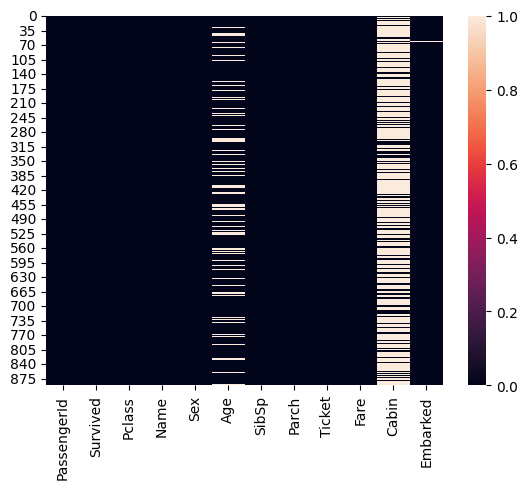

In [270]:
sns.heatmap(df_train.isna())

# Check the percentage of null values on age

In [271]:
df_train['Age'].isna().sum()/len(df_train) * 100

19.865319865319865

# Check the percentage of null values on Cabin

In [272]:
df_train['Cabin'].isna().sum()/len(df_train) * 100

77.10437710437711

# Find distribution of the age column

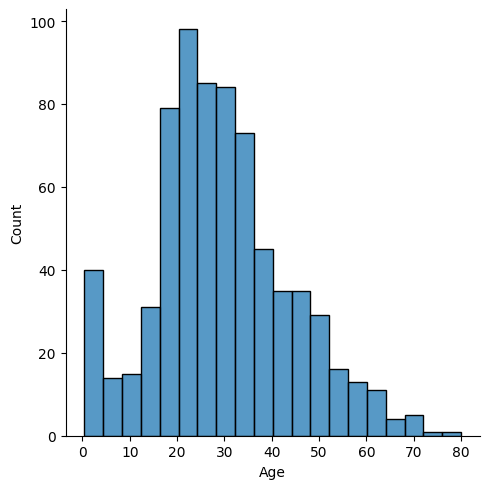

In [273]:
sns.displot(x='Age',data=df_train)

# Data cleaning

### Filling the missing values

In [274]:
# fill age column
df_train['Age'].mean()
# Inplace means to replace the actual data i the dataframe make the edit on the dataframe we are using and saves it
df_train['Age'].fillna(df_train['Age'].mean(),inplace=True)
df_test['Age'].fillna(df_test['Age'].mean(),inplace=True)

In [275]:
df_train.isna().sum()
df_test.isna().sum()


PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [276]:
df_train.drop('Cabin',axis=1,inplace=True)
df_test.drop('Cabin',axis=1,inplace=True)


In [277]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


# Preparing the data for the model

In [278]:
df_test.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

In [279]:
df_train.dtypes


PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

In [280]:
gender = pd.get_dummies(df_train['Sex'],drop_first=True)
df_train['Sex'] = gender
gender = pd.get_dummies(df_test['Sex'],drop_first=True)
df_test['Sex'] = gender

In [281]:
df_train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,S


# Remove  useless columns

In [282]:
df_train.drop(['Name','Embarked','Ticket',],axis=1,inplace=True)
df_test.drop(['Name','Embarked','Ticket',],axis=1,inplace=True)


In [283]:
df_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,1,22.0,1,0,7.2500
1,2,1,1,0,38.0,1,0,71.2833
2,3,1,3,0,26.0,0,0,7.9250
3,4,1,1,0,35.0,1,0,53.1000
4,5,0,3,1,35.0,0,0,8.0500


In [284]:
 # Separate dependant and independant variables
x= df_train[['PassengerId','Pclass',	"Sex",	"Age",	"SibSp",	"Parch",	"Fare"]]
y = df_train['Survived']
x

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,3,1,22.000000,1,0,7.2500
1,2,1,0,38.000000,1,0,71.2833
2,3,3,0,26.000000,0,0,7.9250
3,4,1,0,35.000000,1,0,53.1000
4,5,3,1,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...
886,887,2,1,27.000000,0,0,13.0000
887,888,1,0,19.000000,0,0,30.0000
888,889,3,0,29.699118,1,2,23.4500
889,890,1,1,26.000000,0,0,30.0000


# Data modeling
## Building the model using Logistic Regression
### Build the model

In [285]:
# import train split method
from sklearn.model_selection import train_test_split


In [286]:
# Train test split
X_train ,X_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=42)

In [287]:
# import logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

In [288]:
gb = GradientBoostingClassifier()
gb.fit(X_train,y_train)

GradientBoostingClassifier()

In [289]:
# Create an instance of logistic regression and start the fit
lr = LogisticRegression()
lr.fit(X_train,y_train)

/Users/slimanitz/opt/anaconda3/envs/data-science/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [290]:
df_test['Fare'].fillna(df_test['Fare'].mean(),inplace=True)
df_test.to_csv('test_cleaned.csv')


In [291]:
#predict
df_test.isna().sum()
prediction = gb.predict(df_test)

len(prediction)

418

# Testing the data

# print confusion matrix

In [292]:
from sklearn.metrics import confusion_matrix

In [293]:
pd.DataFrame(confusion_matrix(y_test,prediction),columns=['Predicted No','Predicted Yes'],index=['Actual No','Actual Yes'])

ValueError: Found input variables with inconsistent numbers of samples: [295, 418]

In [ ]:
# import classification report
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test,prediction))
len(prediction)

Precision: is the ratio of correctly predicted positive observations to the total predicted positive observations 


Recall: Rcall ios the ratio of correclty predicted positive observations to the all observations in actual class F1 score- F1


Score is the weighted average of Precision and Recall

In [ ]:
df_test = pd.read_csv('test.csv')
submission_df = pd.DataFrame({'PassengerId':df_test['PassengerId'],'Survived':prediction})
submission_df.to_csv('submission.csv',index=False)